In [1]:
import copy as cp
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
# control normalization values from 3 may experiment for 9 may experiment
raw_dat = pd.read_csv('Experiment 3may2024_PabloCR_127_129_89_argtRNA_LunaNEB Selected Filter SYBR Green I _ HRM Dye (465-510) - Copy of Cq.csv')
# raw_dat = raw_dat_089.loc[ (raw_dat_089['Line']=='pPC089') | ((raw_dat_089['Line']=='pPC127')&(raw_dat_089['Target_type']=='Control')) | ((raw_dat_089['Line']=='pPC129')&(raw_dat_089['Target_type']=='Control')), ]

# dat = dat_127
# dat = dat[['Target_type','IPTG','Replicate','Cp']]
# dat = dat.groupby(['Target_type','IPTG','Replicate']).mean().reset_index()

dat = raw_dat
dat = dat[['Line','Target_type','IPTG','Replicate','Cp']]
dat = dat.groupby(['Line','Target_type','IPTG','Replicate']).mean().reset_index()

cp_norm_list = []
for line in dat['Line'].unique():
    cp_norm_0 = np.array( dat.loc[ (dat['Line']==line) & (dat['Target_type']=='Target') & (dat['IPTG']==0),'Cp' ] ) - np.array( dat.loc[ (dat['Line']==line) & (dat['Target_type']=='Control') & (dat['IPTG']==0),'Cp' ] ).mean()
    cp_norm_2 = np.array( dat.loc[ (dat['Line']==line) & (dat['Target_type']=='Target') & (dat['IPTG']==2),'Cp' ] ) - np.array( dat.loc[ (dat['Line']==line) & (dat['Target_type']=='Control') & (dat['IPTG']==2),'Cp' ] ).mean()
    cp_norm = np.concatenate([cp_norm_0,cp_norm_2])
    
    cp_norm_list.append( cp.deepcopy(cp_norm) )

dat = dat.loc[ dat['Target_type']=='Target', ]
dat['dCp'] = np.concatenate(cp_norm_list)

# dat['Expression'] = np.power( 2,-dat['dCp'] )

# print( dat.loc[ (dat['IPTG']==2)&(dat['Line']=='pPC089'),'Expression' ].mean() / dat.loc[ (dat['IPTG']==0)&(dat['Line']=='pPC089'),'Expression' ].mean() )
# print( dat.loc[ (dat['IPTG']==2)&(dat['Line']=='pPC127'),'Expression' ].mean() / dat.loc[ (dat['IPTG']==0)&(dat['Line']=='pPC127'),'Expression' ].mean() )
# print( dat.loc[ (dat['IPTG']==2)&(dat['Line']=='pPC129'),'Expression' ].mean() / dat.loc[ (dat['IPTG']==0)&(dat['Line']=='pPC129'),'Expression' ].mean() )

ctrls = dat.groupby(['Line','Target_type','IPTG']).mean().reset_index()
ctrls = ctrls.loc[ctrls['IPTG']==2,]

ctrls

# dat

,Line,Target_type,IPTG,Replicate,Cp,dCp
1,pPC089,Target,2,2.0,16.833333,-3.830000
3,pPC127,Target,2,2.0,19.126667,-3.667778
5,pPC129,Target,2,2.0,19.452222,-2.880556


In [30]:
# control gene switch values from 9 may experiment
swi_dat = pd.read_csv('Experiment 9 may 2024 127 129 qPCR - Cq.csv')
swi_dat = swi_dat.loc[ (swi_dat['Target_type']=='Control') & ( (swi_dat['Line']=='pPC127') | (swi_dat['Line']=='pPC129') ), ]

swi_dat_ctrls = cp.deepcopy(swi_dat)
swi_dat_ctrls.loc[ swi_dat_ctrls['Line']=='pPC127','Cp' ] = swi_dat_ctrls.loc[ swi_dat_ctrls['Line']=='pPC127','Cp' ] + (ctrls.loc[ctrls['Line']=='pPC127','dCp']).iloc[0]
swi_dat_ctrls.loc[ swi_dat_ctrls['Line']=='pPC129','Cp' ] = swi_dat_ctrls.loc[ swi_dat_ctrls['Line']=='pPC129','Cp' ] + (ctrls.loc[ctrls['Line']=='pPC127','dCp']).iloc[0]

swi_dat.loc[ swi_dat['Line']=='pPC127','Line' ] = 'PI4K \n(reg. \nPI3K)'
swi_dat.loc[ swi_dat['Line']=='pPC129','Line' ] = 'PI3K \n(reg. \nPI4K)'
swi_dat[ 'Target_type' ] = 'Target'
swi_dat_ctrls.loc[ swi_dat_ctrls['Line']=='pPC127','Line' ] = 'PI4K \n(reg. \nPI3K)'
swi_dat_ctrls.loc[ swi_dat_ctrls['Line']=='pPC129','Line' ] = 'PI3K \n(reg. \nPI4K)'

swi_dat = pd.concat( [swi_dat,swi_dat_ctrls] )
swi_dat

# dat = dat_127
# dat = dat[['Target_type','IPTG','Replicate','Cp']]
# dat = dat.groupby(['Target_type','IPTG','Replicate']).mean().reset_index()

# dat = swi_dat
# dat = dat[['Line','Target_type','IPTG','Replicate','Cp']]
# dat = dat.groupby(['Line','Target_type','IPTG','Replicate']).mean().reset_index()

# cp_norm_list = []
# for line in dat['Line'].unique():
#     cp_norm_0 = np.array( dat.loc[ (dat['Line']==line) & (dat['Target_type']=='Target') & (dat['IPTG']==0),'Cp' ] ) - np.array( dat.loc[ (dat['Line']==line) & (dat['Target_type']=='Control') & (dat['IPTG']==0),'Cp' ] ).mean()
#     cp_norm_2 = np.array( dat.loc[ (dat['Line']==line) & (dat['Target_type']=='Target') & (dat['IPTG']==2),'Cp' ] ) - np.array( dat.loc[ (dat['Line']==line) & (dat['Target_type']=='Control') & (dat['IPTG']==2),'Cp' ] ).mean()
#     cp_norm = np.concatenate([cp_norm_0,cp_norm_2])
    
#     cp_norm_list.append( cp.deepcopy(cp_norm) )

# dat = dat.loc[ dat['Target_type']=='Target', ]
# dat['dCp'] = np.concatenate(cp_norm_list)

# # dat['Expression'] = np.power( 2,-dat['dCp'] )

# # print( dat.loc[ (dat['IPTG']==2)&(dat['Line']=='pPC089'),'Expression' ].mean() / dat.loc[ (dat['IPTG']==0)&(dat['Line']=='pPC089'),'Expression' ].mean() )
# # print( dat.loc[ (dat['IPTG']==2)&(dat['Line']=='pPC127'),'Expression' ].mean() / dat.loc[ (dat['IPTG']==0)&(dat['Line']=='pPC127'),'Expression' ].mean() )
# # print( dat.loc[ (dat['IPTG']==2)&(dat['Line']=='pPC129'),'Expression' ].mean() / dat.loc[ (dat['IPTG']==0)&(dat['Line']=='pPC129'),'Expression' ].mean() )

# ctrls = dat.groupby(['Line','Target_type','IPTG']).mean().reset_index()
# ctrls = ctrl.loc[ctrl['IPTG']==2,]

# ctrls

# dat

,Include,Color,Pos,Name,Cp,Concentration,Standard,Status,Line,Target_type,Target,IPTG,Replicate
36,True,255,D1,Sample 37,18.010000,NaN,0,NaN,PI4K \n(reg. \nPI3K),Target,PI4K,0,1
37,True,255,D2,Sample 38,18.260000,NaN,0,NaN,PI4K \n(reg. \nPI3K),Target,PI4K,0,2
38,True,255,D3,Sample 39,18.660000,NaN,0,NaN,PI4K \n(reg. \nPI3K),Target,PI4K,0,3
39,True,255,D4,Sample 40,18.700000,NaN,0,NaN,PI4K \n(reg. \nPI3K),Target,PI4K,2,1
40,True,255,D5,Sample 41,19.210000,NaN,0,NaN,PI4K \n(reg. \nPI3K),Target,PI4K,2,2
41,True,255,D6,Sample 42,18.500000,NaN,0,NaN,PI4K \n(reg. \nPI3K),Target,PI4K,2,3
42,True,255,D7,Sample 43,18.580000,NaN,0,NaN,PI3K \n(reg. \nPI4K),Target,PI3K,0,1
43,True,255,D8,Sample 44,18.820000,NaN,0,NaN,PI3K \n(reg. \nPI4K),Target,PI3K,0,2
44,True,255,D9,Sample 45,18.750000,NaN,0,NaN,PI3K \n(reg. \nPI4K),Target,PI3K,0,3
45,True,255,D10,Sample 46,18.490000,NaN,0,NaN,PI3K \n(reg. \nPI4K),Target,PI3K,2,1


In [31]:
raw_dat_127_129 = pd.read_csv('Experiment 9 may 2024 127 129 qPCR - Cq.csv')
raw_dat_089 = pd.read_csv('Experiment 3may2024_PabloCR_127_129_89_argtRNA_LunaNEB Selected Filter SYBR Green I _ HRM Dye (465-510) - Copy of Cq.csv')
raw_dat_089 = raw_dat_089.loc[ raw_dat_089['Line']=='pPC089', ]
# raw_dat = pd.read_csv('Experiment 1may2024_PabloCR_127_129_tRNA_LunaNEB Selected Filter SYBR Green I _ HRM Dye (465-510) - Cq.csv')
raw_dat = pd.concat([raw_dat_127_129, raw_dat_089, swi_dat])
raw_dat = raw_dat[['Line','Target_type','IPTG','Replicate','Cp']]

In [32]:
# raw_dat = pd.read_csv('Experiment 9 may 2024 127 129 qPCR - Cq.csv')
# # raw_dat = pd.read_csv('Experiment 3may2024_PabloCR_127_129_89_argtRNA_LunaNEB Selected Filter SYBR Green I _ HRM Dye (465-510) - Copy of Cq.csv')
# # raw_dat = pd.read_csv('Experiment 1may2024_PabloCR_127_129_tRNA_LunaNEB Selected Filter SYBR Green I _ HRM Dye (465-510) - Cq.csv')

# raw_dat = raw_dat[['Line','Target_type','IPTG','Replicate','Cp']]

# dat_127 = raw_dat.loc[ raw_dat['Line']=='pPC127', ]
# dat_129 = raw_dat.loc[ raw_dat['Line']=='pPC129', ]
# dat_089 = raw_dat.loc[ raw_dat['Line']=='pPC089', ]

In [33]:
raw_dat

,Line,Target_type,IPTG,Replicate,Cp
0,pPC127,Target,0,1,19.810000
1,pPC127,Target,0,2,19.620000
2,pPC127,Target,0,3,20.430000
3,pPC127,Target,2,1,18.200000
4,pPC127,Target,2,2,18.410000
...,...,...,...,...,...
43,PI3K \n(reg. \nPI4K),Control,0,2,15.152222
44,PI3K \n(reg. \nPI4K),Control,0,3,15.082222
45,PI3K \n(reg. \nPI4K),Control,2,1,14.822222
46,PI3K \n(reg. \nPI4K),Control,2,2,14.502222


In [34]:
# dat = raw_dat
# dat = dat[['Line','Target_type','IPTG','Replicate','Cp']]
# dat = dat.groupby(['Line','Target_type','IPTG','Replicate']).mean().reset_index()

# # cp_norm_0 = np.array( dat.loc[ (dat['Target_type']=='Target') & (dat['IPTG']==0),'Cp' ] ) - np.array( dat.loc[ (dat['Target_type']=='Control') & (dat['IPTG']==0),'Cp' ] ).mean()
# # cp_norm_2 = np.array( dat.loc[ (dat['Target_type']=='Target') & (dat['IPTG']==2),'Cp' ] ) - np.array( dat.loc[ (dat['Target_type']=='Control') & (dat['IPTG']==2),'Cp' ] ).mean()
# # cp_norm = np.concatenate([cp_norm_0,cp_norm_2])

# # print(np.array( dat.loc[ (dat['Target_type']=='Control') & (dat['IPTG']==0),'Cp' ] ).mean())

# # dat['Expression'] = np.power( 2,-dat['Cp'] )

# # dat

# dat.groupby(['Line','Target_type','IPTG','Replicate'])
ctrls.loc[ctrls['Line']==line,'dCp']

5   -2.880556
Name: dCp, dtype: float64

In [35]:
dat = raw_dat
dat = dat[['Line','Target_type','IPTG','Replicate','Cp']]
dat = dat.groupby(['Line','Target_type','IPTG','Replicate']).mean().reset_index()

cp_norm_list = []
for line in dat['Line'].unique():
    cp_norm_0 = np.array( dat.loc[ (dat['Line']==line) & (dat['Target_type']=='Target') & (dat['IPTG']==0),'Cp' ] ) - np.array( dat.loc[ (dat['Line']==line) & (dat['Target_type']=='Control') & (dat['IPTG']==0),'Cp' ] ).mean()
    cp_norm_2 = np.array( dat.loc[ (dat['Line']==line) & (dat['Target_type']=='Target') & (dat['IPTG']==2),'Cp' ] ) - np.array( dat.loc[ (dat['Line']==line) & (dat['Target_type']=='Control') & (dat['IPTG']==2),'Cp' ] ).mean()
    cp_norm = np.concatenate([cp_norm_0,cp_norm_2])
    
    cp_norm_list.append( cp.deepcopy(cp_norm) )

dat

,Line,Target_type,IPTG,Replicate,Cp
0,PI3K \n(reg. \nPI4K),Control,0,1,14.912222
1,PI3K \n(reg. \nPI4K),Control,0,2,15.152222
2,PI3K \n(reg. \nPI4K),Control,0,3,15.082222
3,PI3K \n(reg. \nPI4K),Control,2,1,14.822222
4,PI3K \n(reg. \nPI4K),Control,2,2,14.502222
5,PI3K \n(reg. \nPI4K),Control,2,3,14.502222
6,PI3K \n(reg. \nPI4K),Target,0,1,18.580000
7,PI3K \n(reg. \nPI4K),Target,0,2,18.820000
8,PI3K \n(reg. \nPI4K),Target,0,3,18.750000
9,PI3K \n(reg. \nPI4K),Target,2,1,18.490000


In [36]:
ctrls.loc[ctrls['Line']=='pPC089','dCp']

1   -3.83
Name: dCp, dtype: float64

In [37]:
# dat = dat_127
# dat = dat[['Target_type','IPTG','Replicate','Cp']]
# dat = dat.groupby(['Target_type','IPTG','Replicate']).mean().reset_index()

dat = raw_dat
dat = dat[['Line','Target_type','IPTG','Replicate','Cp']]
dat = dat.groupby(['Line','Target_type','IPTG','Replicate']).mean().reset_index()

cp_norm_list = []
for line in dat['Line'].unique():
    cp_norm_0 = np.array( dat.loc[ (dat['Line']==line) & (dat['Target_type']=='Target') & (dat['IPTG']==0),'Cp' ] ) - np.array( dat.loc[ (dat['Line']==line) & (dat['Target_type']=='Control') & (dat['IPTG']==0),'Cp' ] ).mean()
    cp_norm_2 = np.array( dat.loc[ (dat['Line']==line) & (dat['Target_type']=='Target') & (dat['IPTG']==2),'Cp' ] ) - np.array( dat.loc[ (dat['Line']==line) & (dat['Target_type']=='Control') & (dat['IPTG']==2),'Cp' ] ).mean()
    cp_norm = np.concatenate([cp_norm_0,cp_norm_2])
    
    cp_norm_list.append( cp.deepcopy(cp_norm) )

dat = dat.loc[ dat['Target_type']=='Target', ]
dat['dCp'] = np.concatenate(cp_norm_list)

# normalization from different experiments
dat_mean = dat.groupby(['Line','Target_type','IPTG']).mean().reset_index()
dat_mean = dat_mean.loc[dat_mean['IPTG']==2,]

for line in ['pPC089','pPC127','pPC129']:
    dat.loc[dat['Line']==line,'dCp'] = dat.loc[dat['Line']==line,'dCp'] - (dat_mean.loc[dat_mean['Line']==line,'dCp']).iloc[0] - (ctrls.loc[ctrls['Line']==line,'dCp']).iloc[0]
    print(line,(dat_mean.loc[dat_mean['Line']==line,'dCp']).iloc[0],(ctrls.loc[ctrls['Line']==line,'dCp']).iloc[0])
##

dat['Expression'] = np.power( 2,-dat['dCp'] )

print( dat.loc[ (dat['IPTG']==2)&(dat['Line']=='pPC089'),'Expression' ].mean() / dat.loc[ (dat['IPTG']==0)&(dat['Line']=='pPC089'),'Expression' ].mean() )
print( dat.loc[ (dat['IPTG']==2)&(dat['Line']=='pPC127'),'Expression' ].mean() / dat.loc[ (dat['IPTG']==0)&(dat['Line']=='pPC127'),'Expression' ].mean() )
print( dat.loc[ (dat['IPTG']==2)&(dat['Line']=='pPC129'),'Expression' ].mean() / dat.loc[ (dat['IPTG']==0)&(dat['Line']=='pPC129'),'Expression' ].mean() )

dat

pPC089 -3.829999999999997 -3.829999999999997
pPC127 -0.5722222222222205 -3.6677777777777743
pPC129 0.6599999999999978 -2.8805555555555564
123.8729964225874
4.728800120806995
3.4437921840281573


,Line,Target_type,IPTG,Replicate,Cp,dCp,Expression
6,PI3K \n(reg. \nPI4K),Target,0,1,18.580000,3.531111,0.086503
7,PI3K \n(reg. \nPI4K),Target,0,2,18.820000,3.771111,0.073246
8,PI3K \n(reg. \nPI4K),Target,0,3,18.750000,3.701111,0.076887
9,PI3K \n(reg. \nPI4K),Target,2,1,18.490000,3.881111,0.067869
10,PI3K \n(reg. \nPI4K),Target,2,2,18.170000,3.561111,0.084722
11,PI3K \n(reg. \nPI4K),Target,2,3,18.170000,3.561111,0.084722
18,PI4K \n(reg. \nPI3K),Target,0,1,18.010000,3.367778,0.096872
19,PI4K \n(reg. \nPI3K),Target,0,2,18.260000,3.617778,0.081459
20,PI4K \n(reg. \nPI3K),Target,0,3,18.660000,4.017778,0.061735
21,PI4K \n(reg. \nPI3K),Target,2,1,18.700000,3.564444,0.084527


Text(6.08333333333333, 0.5, 'Expression level \n(normalized to \narginyl-tRNA synthetase)')

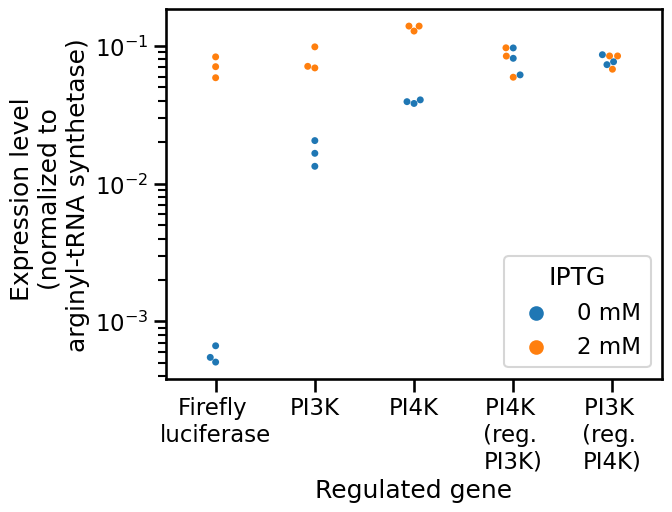

In [55]:
dat = dat.replace('pPC089','Firefly \nluciferase').replace('pPC127','PI3K').replace('pPC129','PI4K').replace(0,'0 mM').replace(2,'2 mM')

sns.set_context("talk")
ax = sns.swarmplot(dat,hue='IPTG',y='Expression',x='Line',order=['Firefly \nluciferase','PI3K','PI4K','PI4K \n(reg. \nPI3K)','PI3K \n(reg. \nPI4K)'])
plt.yscale('log')
plt.xlabel('Regulated gene')
plt.ylabel('Expression level \n(normalized to \narginyl-tRNA synthetase)')
# ax.set_xticks(range(3)) # <--- set the ticks first
# ax.set_xticks(['Firefly \nluciferase','PI3K','PI4K'])
# ax.set_xticks(range(len(df)), labels=range(2011, 2019))

In [131]:
print(raw_dat.loc[ (raw_dat['IPTG']==2)&(raw_dat['Target_type']=='Tar')&(raw_dat['Line']=='pPC129'), 'Cp'].mean())
raw_dat.loc[ (raw_dat['IPTG']==2)&(raw_dat['Target_type']=='Control')&(raw_dat['Line']=='pPC129'), ]

nan


,Line,Target_type,IPTG,Replicate,Cp
45,pPC129,Control,2,1,18.49
46,pPC129,Control,2,2,18.17
47,pPC129,Control,2,3,18.17


In [97]:
22.37-16.83

5.540000000000003

In [41]:
2**5.54

46.52712055424994

In [ ]:
# control normalization values from 3 may experiment for 9 may experiment
raw_dat = pd.read_csv('Experiment 31 may 2024 89 127 129 qPCR - Copy of Cq.csv')
# raw_dat = raw_dat_089.loc[ (raw_dat_089['Line']=='pPC089') | ((raw_dat_089['Line']=='pPC127')&(raw_dat_089['Target_type']=='Control')) | ((raw_dat_089['Line']=='pPC129')&(raw_dat_089['Target_type']=='Control')), ]

# dat = dat_127
# dat = dat[['Target_type','IPTG','Replicate','Cp']]
# dat = dat.groupby(['Target_type','IPTG','Replicate']).mean().reset_index()

dat = raw_dat
dat = dat[['Line','Target_type','IPTG','Replicate','Cp']]
dat = dat.groupby(['Line','Target_type','IPTG','Replicate']).mean().reset_index()

cp_norm_list = []
for line in dat['Line'].unique():
    cp_norm_0 = np.array( dat.loc[ (dat['Line']==line) & (dat['Target_type']=='Target') & (dat['IPTG']==0),'Cp' ] ) - np.array( dat.loc[ (dat['Line']==line) & (dat['Target_type']=='Control') & (dat['IPTG']==0),'Cp' ] ).mean()
    cp_norm_2 = np.array( dat.loc[ (dat['Line']==line) & (dat['Target_type']=='Target') & (dat['IPTG']==2),'Cp' ] ) - np.array( dat.loc[ (dat['Line']==line) & (dat['Target_type']=='Control') & (dat['IPTG']==2),'Cp' ] ).mean()
    cp_norm = np.concatenate([cp_norm_0,cp_norm_2])
    
    cp_norm_list.append( cp.deepcopy(cp_norm) )

dat = dat.loc[ dat['Target_type']=='Target', ]
dat['dCp'] = np.concatenate(cp_norm_list)

# dat['Expression'] = np.power( 2,-dat['dCp'] )

# print( dat.loc[ (dat['IPTG']==2)&(dat['Line']=='pPC089'),'Expression' ].mean() / dat.loc[ (dat['IPTG']==0)&(dat['Line']=='pPC089'),'Expression' ].mean() )
# print( dat.loc[ (dat['IPTG']==2)&(dat['Line']=='pPC127'),'Expression' ].mean() / dat.loc[ (dat['IPTG']==0)&(dat['Line']=='pPC127'),'Expression' ].mean() )
# print( dat.loc[ (dat['IPTG']==2)&(dat['Line']=='pPC129'),'Expression' ].mean() / dat.loc[ (dat['IPTG']==0)&(dat['Line']=='pPC129'),'Expression' ].mean() )

ctrls = dat.groupby(['Line','Target_type','IPTG']).mean().reset_index()
ctrls = ctrls.loc[ctrls['IPTG']==2,]

ctrls

# dat

In [4]:
# dat = dat_127
# dat = dat[['Target_type','IPTG','Replicate','Cp']]
# dat = dat.groupby(['Target_type','IPTG','Replicate']).mean().reset_index()
raw_dat = pd.read_csv('Experiment 31 may 2024 89 127 129 qPCR - Copy of Cq.csv')

dat = raw_dat
dat = dat[['Line','Target_type','IPTG','Replicate','Cp']]
dat = dat.groupby(['Line','Target_type','IPTG','Replicate']).mean().reset_index()

cp_norm_list = []
for line in dat['Line'].unique():
    cp_norm_0 = np.array( dat.loc[ (dat['Line']==line) & (dat['Target_type']=='Target') & (dat['IPTG']==0),'Cp' ] ) - np.array( dat.loc[ (dat['Line']==line) & (dat['Target_type']=='Control') & (dat['IPTG']==0),'Cp' ] ).mean()
    cp_norm_2 = np.array( dat.loc[ (dat['Line']==line) & (dat['Target_type']=='Target') & (dat['IPTG']==2),'Cp' ] ) - np.array( dat.loc[ (dat['Line']==line) & (dat['Target_type']=='Control') & (dat['IPTG']==2),'Cp' ] ).mean()
    cp_norm = np.concatenate([cp_norm_0,cp_norm_2])
    
    cp_norm_list.append( cp.deepcopy(cp_norm) )

dat = dat.loc[ dat['Target_type']=='Target', ]
dat['dCp'] = np.concatenate(cp_norm_list)

# # normalization from different experiments
# dat_mean = dat.groupby(['Line','Target_type','IPTG']).mean().reset_index()
# dat_mean = dat_mean.loc[dat_mean['IPTG']==2,]

# for line in ['pPC089','pPC127','pPC129']:
#     dat.loc[dat['Line']==line,'dCp'] = dat.loc[dat['Line']==line,'dCp'] - (dat_mean.loc[dat_mean['Line']==line,'dCp']).iloc[0] - (ctrls.loc[ctrls['Line']==line,'dCp']).iloc[0]
#     print(line,(dat_mean.loc[dat_mean['Line']==line,'dCp']).iloc[0],(ctrls.loc[ctrls['Line']==line,'dCp']).iloc[0])
# ##

dat['Expression'] = np.power( 2,-dat['dCp'] )

print( dat.loc[ (dat['IPTG']==2)&(dat['Line']=='pPC089'),'Expression' ].mean() / dat.loc[ (dat['IPTG']==0)&(dat['Line']=='pPC089'),'Expression' ].mean() )
print( dat.loc[ (dat['IPTG']==2)&(dat['Line']=='pPC127'),'Expression' ].mean() / dat.loc[ (dat['IPTG']==0)&(dat['Line']=='pPC127'),'Expression' ].mean() )
print( dat.loc[ (dat['IPTG']==2)&(dat['Line']=='pPC129'),'Expression' ].mean() / dat.loc[ (dat['IPTG']==0)&(dat['Line']=='pPC129'),'Expression' ].mean() )

dat

10.924655031333915
3.3108408800739615
2.1880211310168316


,Line,Target_type,IPTG,Replicate,Cp,dCp,Expression
6,pPC089,Target,0,1,19.370000,5.025556,0.030701
7,pPC089,Target,0,2,20.646667,6.302222,0.012672
8,pPC089,Target,0,3,20.126667,5.782222,0.018171
9,pPC089,Target,2,1,16.476667,2.102222,0.232899
10,pPC089,Target,2,2,16.816667,2.442222,0.184000
11,pPC089,Target,2,3,16.343333,1.968889,0.255450
18,pPC127,Target,0,1,18.440000,5.400000,0.023683
19,pPC127,Target,0,2,17.813333,4.773333,0.036567
20,pPC127,Target,0,3,18.696667,5.656667,0.019823
21,pPC127,Target,2,1,16.163333,3.460000,0.090873


Text(5.95833333333333, 0.5, 'Expression level \n(normalized to \narginyl-tRNA synthetase)')

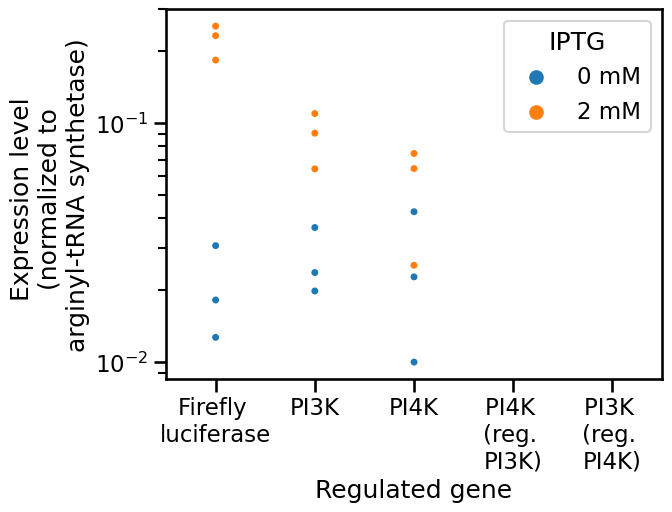

In [5]:
dat = dat.replace('pPC089','Firefly \nluciferase').replace('pPC127','PI3K').replace('pPC129','PI4K').replace(0,'0 mM').replace(2,'2 mM')

sns.set_context("talk")
ax = sns.swarmplot(dat,hue='IPTG',y='Expression',x='Line',order=['Firefly \nluciferase','PI3K','PI4K','PI4K \n(reg. \nPI3K)','PI3K \n(reg. \nPI4K)'])
plt.yscale('log')
plt.xlabel('Regulated gene')
plt.ylabel('Expression level \n(normalized to \narginyl-tRNA synthetase)')
# ax.set_xticks(range(3)) # <--- set the ticks first
# ax.set_xticks(['Firefly \nluciferase','PI3K','PI4K'])
# ax.set_xticks(range(len(df)), labels=range(2011, 2019))

In [132]:
# control normalization values from 4 jun experiment for 9 may experiment
# raw_dat = pd.read_csv('qPCR data combined 89 127 129 - Cq.csv')
# raw_dat = pd.read_csv('qPCR data combined 89 127 129 - 72 h.csv')
raw_dat = pd.read_csv('qPCR data combined 89 127 129 - 24 h.csv')
# raw_dat = pd.read_csv('qPCR data combined 89 127 129 - 12 h.csv')
# raw_dat = pd.read_csv('qPCR data combined 89 127 129 - 4 h (24 switch).csv')

dat = raw_dat
dat = dat[['Line','Target_type','Target','IPTG','Replicate','Cp']]
dat = dat.groupby(['Line','Target_type','Target','IPTG','Replicate']).mean().reset_index()

new_dat = cp.deepcopy(dat)
new_dat = new_dat.loc[ new_dat['Target_type']=='Target', ]
new_dat['dCp'] = 0

cp_norm_list = []
for line in dat['Line'].unique():
    for target in dat.loc[ (dat['Line']==line) & (dat['Target_type']=='Target') ,'Target'].unique():
        for rep in dat.loc[ (dat['Line']==line) & (dat['Target_type']=='Target') & (dat['Target']==target),'Replicate'].unique():
            cp_norm_0 = dat.loc[ (dat['Line']==line) & (dat['Target']==target) & (dat['Replicate']==rep) & (dat['IPTG']==0),'Cp' ].iloc[0] - np.array( dat.loc[ (dat['Line']==line) & (dat['Target_type']=='Control') & (dat['Replicate']==rep) & (dat['IPTG']==0),'Cp' ] ).mean()
            cp_norm_2 = dat.loc[ (dat['Line']==line) & (dat['Target']==target) & (dat['Replicate']==rep) & (dat['IPTG']==2),'Cp' ].iloc[0] - np.array( dat.loc[ (dat['Line']==line) & (dat['Target_type']=='Control') & (dat['Replicate']==rep) & (dat['IPTG']==2),'Cp' ] ).mean()
            
#             print(line,target,rep,cp_norm_0)
#             print(line,target,rep,cp_norm_2)
            
            new_dat.loc[ (new_dat['Line']==line) & (dat['Target']==target) & (new_dat['Replicate']==rep) & (new_dat['IPTG']==0), 'dCp'] = cp_norm_0
            new_dat.loc[ (new_dat['Line']==line) & (dat['Target']==target) & (new_dat['Replicate']==rep) & (new_dat['IPTG']==2), 'dCp'] = cp_norm_2
            
#             cp_norm = np.concatenate([cp_norm_0,cp_norm_2])

#             cp_norm_list.append( cp.deepcopy(cp_norm) )

# dat = dat.loc[ dat['Target_type']=='Target', ]
# dat['dCp'] = np.concatenate(cp_norm_list)

dat = new_dat

dat['Expression'] = np.power( 2,-dat['dCp'] )

print( dat.loc[ (dat['IPTG']==2)&(dat['Target']=='FLuc'),'Expression' ].mean() / dat.loc[ (dat['IPTG']==0)&(dat['Target']=='FLuc'),'Expression' ].mean() )
print( dat.loc[ (dat['IPTG']==2)&(dat['Target']=='PI3K'),'Expression' ].mean() / dat.loc[ (dat['IPTG']==0)&(dat['Target']=='PI3K'),'Expression' ].mean() )
print( dat.loc[ (dat['IPTG']==2)&(dat['Target']=='PI4K'),'Expression' ].mean() / dat.loc[ (dat['IPTG']==0)&(dat['Target']=='PI4K'),'Expression' ].mean() )
print( dat.loc[ (dat['IPTG']==2)&(dat['Target']=='PI4K (reg. PI3K)'),'Expression' ].mean() / dat.loc[ (dat['IPTG']==0)&(dat['Target']=='PI4K (reg. PI3K)'),'Expression' ].mean() )
print( dat.loc[ (dat['IPTG']==2)&(dat['Target']=='PI3K (reg. PI4K)'),'Expression' ].mean() / dat.loc[ (dat['IPTG']==0)&(dat['Target']=='PI3K (reg. PI4K)'),'Expression' ].mean() )

dat

28.509863871103974
6.055675770010356
6.577141212798126
1.2433624331978013
1.258246734515224


,Line,Target_type,Target,IPTG,Replicate,Cp,dCp,Expression
6,pPC089,Target,FLuc,0,1,22.350000,8.960000,0.002008
7,pPC089,Target,FLuc,0,2,22.175000,8.975000,0.001987
8,pPC089,Target,FLuc,0,3,22.145000,8.715000,0.002380
9,pPC089,Target,FLuc,2,1,17.170000,4.055000,0.060162
10,pPC089,Target,FLuc,2,2,15.770000,4.055000,0.060162
11,pPC089,Target,FLuc,2,3,16.270000,4.025000,0.061426
18,pPC127,Target,PI3K,0,1,19.980000,6.850000,0.008669
19,pPC127,Target,PI3K,0,2,19.673333,7.096667,0.007306
20,pPC127,Target,PI3K,0,3,20.293333,7.890000,0.004216
21,pPC127,Target,PI3K,2,1,18.413333,5.106667,0.029023


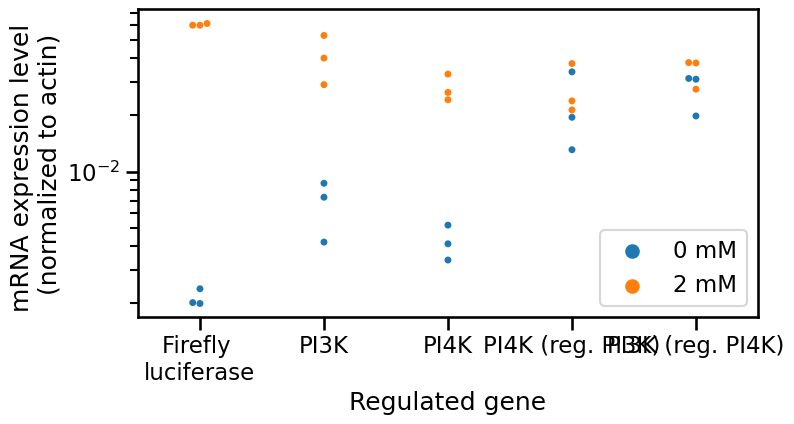

In [133]:
dat = dat.replace('FLuc','Firefly \nluciferase')
dat['IPTG'] = dat['IPTG'].replace(0,'0 mM').replace(2,'2 mM')

plt.figure(figsize=(8,4))
sns.set_context("talk")
ax = sns.swarmplot(dat,hue='IPTG',y='Expression',x='Target',order=['Firefly \nluciferase','PI3K','PI4K','PI4K (reg. PI3K)','PI3K (reg. PI4K)'])
plt.yscale('log')
plt.xlabel('Regulated gene')
plt.ylabel('mRNA expression level \n(normalized to actin)')
plt.legend(loc='lower right')
# ax.set_xticks(range(3)) # <--- set the ticks first
# ax.set_xticks(['Firefly \nluciferase','PI3K','PI4K'])
# ax.set_xticks(range(len(df)), labels=range(2011, 2019))

In [ ]:
# control normalization values from 4 jun experiment for 9 may experiment
# raw_dat = pd.read_csv('qPCR data combined 89 127 129 - Cq.csv')
raw_dat = pd.read_csv('Experiment 10 Jun 2024 1 89 (12, 24 h) 127 129 12 h qPCR - Copy of Cq.csv')
# raw_dat = pd.read_csv('qPCR data combined 89 127 129 - 24 h.csv')
# raw_dat = pd.read_csv('qPCR data combined 89 127 129 - 4 h (24 switch).csv')

dat = raw_dat
dat = dat[['Line','Target_type','Target','IPTG','Replicate','Cp']]
dat = dat.groupby(['Line','Target_type','Target','IPTG','Replicate']).mean().reset_index()

new_dat = cp.deepcopy(dat)
new_dat = new_dat.loc[ new_dat['Target_type']=='Target', ]
new_dat['dCp'] = 0

cp_norm_list = []
for line in dat['Line'].unique():
    for target in dat.loc[ (dat['Line']==line) & (dat['Target_type']=='Target') ,'Target'].unique():
        for rep in dat.loc[ (dat['Line']==line) & (dat['Target_type']=='Target') & (dat['Target']==target),'Replicate'].unique():
            cp_norm_0 = dat.loc[ (dat['Line']==line) & (dat['Target']==target) & (dat['Replicate']==rep) & (dat['IPTG']==0),'Cp' ].iloc[0] - np.array( dat.loc[ (dat['Line']==line) & (dat['Target_type']=='Control') & (dat['Replicate']==rep) & (dat['IPTG']==0),'Cp' ] ).mean()
            cp_norm_2 = dat.loc[ (dat['Line']==line) & (dat['Target']==target) & (dat['Replicate']==rep) & (dat['IPTG']==2),'Cp' ].iloc[0] - np.array( dat.loc[ (dat['Line']==line) & (dat['Target_type']=='Control') & (dat['Replicate']==rep) & (dat['IPTG']==2),'Cp' ] ).mean()
            
#             print(line,target,rep,cp_norm_0)
#             print(line,target,rep,cp_norm_2)
            
            new_dat.loc[ (new_dat['Line']==line) & (dat['Target']==target) & (new_dat['Replicate']==rep) & (new_dat['IPTG']==0), 'dCp'] = cp_norm_0
            new_dat.loc[ (new_dat['Line']==line) & (dat['Target']==target) & (new_dat['Replicate']==rep) & (new_dat['IPTG']==2), 'dCp'] = cp_norm_2
            
#             cp_norm = np.concatenate([cp_norm_0,cp_norm_2])

#             cp_norm_list.append( cp.deepcopy(cp_norm) )

# dat = dat.loc[ dat['Target_type']=='Target', ]
# dat['dCp'] = np.concatenate(cp_norm_list)

dat = new_dat

dat['Expression'] = np.power( 2,-dat['dCp'] )

print( dat.loc[ (dat['IPTG']==2)&(dat['Target']=='FLuc'),'Expression' ].mean() / dat.loc[ (dat['IPTG']==0)&(dat['Target']=='FLuc'),'Expression' ].mean() )
print( dat.loc[ (dat['IPTG']==2)&(dat['Target']=='PI3K'),'Expression' ].mean() / dat.loc[ (dat['IPTG']==0)&(dat['Target']=='PI3K'),'Expression' ].mean() )
print( dat.loc[ (dat['IPTG']==2)&(dat['Target']=='PI4K'),'Expression' ].mean() / dat.loc[ (dat['IPTG']==0)&(dat['Target']=='PI4K'),'Expression' ].mean() )
print( dat.loc[ (dat['IPTG']==2)&(dat['Target']=='PI4K (reg. PI3K)'),'Expression' ].mean() / dat.loc[ (dat['IPTG']==0)&(dat['Target']=='PI4K (reg. PI3K)'),'Expression' ].mean() )
print( dat.loc[ (dat['IPTG']==2)&(dat['Target']=='PI3K (reg. PI4K)'),'Expression' ].mean() / dat.loc[ (dat['IPTG']==0)&(dat['Target']=='PI3K (reg. PI4K)'),'Expression' ].mean() )

dat

In [ ]:
dat = dat.replace('FLuc','Firefly \nluciferase')
dat['IPTG'] = dat['IPTG'].replace(0,'0 mM').replace(2,'2 mM')

plt.figure(figsize=(8,4))
sns.set_context("talk")
ax = sns.swarmplot(dat,hue='IPTG',y='Expression',x='Target',order=['Firefly \nluciferase','PI3K','PI4K','PI4K (reg. PI3K)','PI3K (reg. PI4K)'])
plt.yscale('log')
plt.xlabel('Regulated gene')
plt.ylabel('mRNA expression level \n(normalized to actin)')
# ax.set_xticks(range(3)) # <--- set the ticks first
# ax.set_xticks(['Firefly \nluciferase','PI3K','PI4K'])
# ax.set_xticks(range(len(df)), labels=range(2011, 2019))

In [ ]:
# Final code:

In [ ]:
import copy as cp
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [266]:
raw_dat = pd.read_csv('qPCR data combined 89 127 129 - Full.csv')

dat = raw_dat
dat = dat[['Hours','Line','Target_type','Target','IPTG','Replicate','Cp']]
dat.loc[ (dat['Line']=='pPC127') & (dat['Target']=='PI4K') ,'Line'] = 'PI4K (reg. PI3K)'
dat.loc[ (dat['Line']=='pPC129') & (dat['Target']=='PI3K') ,'Line'] = 'PI3K (reg. PI4K)'

add_rows_127 = cp.deepcopy( dat.loc[ (dat['Line']=='pPC127') & (dat['Target_type']=='Control') ,] )
add_rows_127['Line'] = 'PI4K (reg. PI3K)'
add_rows_129 = cp.deepcopy( dat.loc[ (dat['Line']=='pPC129') & (dat['Target_type']=='Control') ,] )
add_rows_129['Line'] = 'PI3K (reg. PI4K)'
dat = pd.concat([dat,add_rows_127,add_rows_129])

dat = dat.groupby(['Hours','Line','Target_type','Target','IPTG','Replicate']).mean().reset_index()

# dat = dat.pivot(index=['Hours','Line','IPTG','Target','Replicate'],columns='Target_type', values='Cp').reset_index()
dat = dat.pivot( index=['Hours','Line','IPTG','Replicate'], columns='Target_type', values='Cp' ).reset_index()

dat['dCp'] = dat['Target'] - dat['Control']
dat['Expression'] = np.power( 2, -dat['dCp'] )

dat


Target_type,Hours,Line,IPTG,Replicate,Control,Target,dCp,Expression
0,4,PI3K (reg. PI4K),0,1,13.503333,18.580000,5.076667,0.029633
1,4,PI3K (reg. PI4K),0,2,13.080000,18.280000,5.200000,0.027205
2,4,PI3K (reg. PI4K),0,3,13.206667,18.570000,5.363333,0.024293
3,4,PI3K (reg. PI4K),2,1,12.980000,18.490000,5.510000,0.021944
4,4,PI3K (reg. PI4K),2,2,12.593333,18.710000,6.116667,0.014411
...,...,...,...,...,...,...,...,...
151,72,pPC129,0,2,21.463333,21.403333,-0.060000,1.042466
152,72,pPC129,0,3,20.383333,21.186667,0.803333,0.573024
153,72,pPC129,2,1,15.370000,15.646667,0.276667,0.825496
154,72,pPC129,2,2,16.440000,16.053333,-0.386667,1.307369


/var/folders/89/20dj8qgx0dj2z68d6fcg6_vc0000gn/T/ipykernel_83333/1314590668.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat_12['IPTG'] = dat_12['IPTG'].replace(0,'0 mM IPTG').replace(2,'2 mM IPTG')


Text(40.58333333333333, 0.5, 'mRNA expression \n(normalized to actin)')

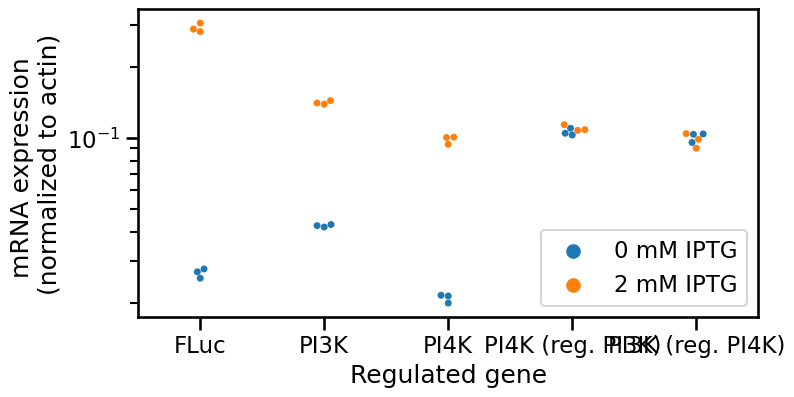

In [267]:
dat_12 = dat.loc[ dat['Hours']==12, ]
dat_12['IPTG'] = dat_12['IPTG'].replace(0,'0 mM IPTG').replace(2,'2 mM IPTG')
dat_12 = dat_12.replace('pPC089','FLuc').replace('pPC127','PI3K').replace('pPC129','PI4K')

plt.figure(figsize=(8,4))
sns.set_context("talk")
ax = sns.swarmplot(dat_12,hue='IPTG',y='Expression',x='Line',order=['FLuc','PI3K','PI4K','PI4K (reg. PI3K)','PI3K (reg. PI4K)'])
plt.yscale('log')
plt.legend(loc = "lower right")
plt.xlabel('Regulated gene')
plt.ylabel('mRNA expression \n(normalized to actin)')

/var/folders/89/20dj8qgx0dj2z68d6fcg6_vc0000gn/T/ipykernel_83333/3175073280.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat_72_LacI['IPTG'] = dat_72_LacI['IPTG'].replace(0,'0 mM IPTG').replace(2,'2 mM IPTG')


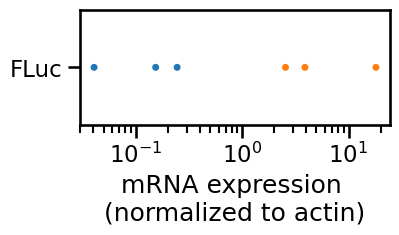

In [268]:
dat_72_LacI = dat.loc[ (dat['Hours']==72)&(dat['Line']=='pPC089'), ]
dat_72_LacI['IPTG'] = dat_72_LacI['IPTG'].replace(0,'0 mM IPTG').replace(2,'2 mM IPTG')
dat_72_LacI = dat_72_LacI.replace('pPC089','FLuc')

plt.figure(figsize=(4,1.5))
sns.set_context("talk")
ax = sns.swarmplot(dat_72_LacI,hue='IPTG',x='Expression',y='Line',orient='h')
plt.xscale('log')
plt.legend(loc = "lower right")
plt.ylabel('')
plt.xlabel('mRNA expression \n(normalized to actin)')
ax.get_legend().remove()

/var/folders/89/20dj8qgx0dj2z68d6fcg6_vc0000gn/T/ipykernel_83333/2485995138.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat_72_TetR['IPTG'] = dat_72_TetR['IPTG'].replace(0,'0 nM aTc').replace(500,'500 nM aTc')


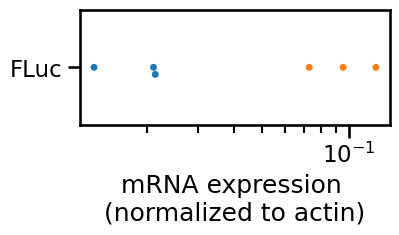

In [269]:
dat_72_TetR = dat.loc[ (dat['Hours']==72)&(dat['Line']=='pPC071'), ]
dat_72_TetR['IPTG'] = dat_72_TetR['IPTG'].replace(0,'0 nM aTc').replace(500,'500 nM aTc')
dat_72_TetR = dat_72_TetR.replace('pPC071','FLuc')

plt.figure(figsize=(4,1.5))
sns.set_context("talk")
ax = sns.swarmplot(dat_72_TetR,hue='IPTG',x='Expression',y='Line',orient='h')
plt.xscale('log')
plt.legend(loc = "lower right")
plt.ylabel('')
plt.xlabel('mRNA expression \n(normalized to actin)')
ax.get_legend().remove()

In [270]:
dat_off = dat.loc[ dat['IPTG']==0 ].groupby(['Hours','Line']).mean().reset_index()
dat_off_len = dat_off.shape[0]
dat_off = pd.concat( [dat_off]*3 )
dat_off['Replicate'] = [1]*dat_off_len + [2]*dat_off_len + [3]*dat_off_len
dat_off = dat_off[['Hours','Line','Replicate','Control','Target','dCp','Expression']]
dat = dat.loc[ dat['IPTG']>0, ]
dat = dat[['Hours','Line','Replicate','Control','Target','dCp','Expression']]
dat = dat.merge( dat_off, how='outer', on=['Hours','Line','Replicate'], suffixes=[None,'_0'] )
dat['Fold change'] = dat['Expression'] / dat['Expression_0']

dat

Target_type,Hours,Line,Replicate,Control,Target,dCp,Expression,Control_0,Target_0,dCp_0,Expression_0,Fold change
0,4,PI3K (reg. PI4K),1,12.980000,18.490000,5.510000,0.021944,13.263333,18.476667,5.213333,0.027043,0.811454
1,4,PI3K (reg. PI4K),2,12.593333,18.710000,6.116667,0.014411,13.263333,18.476667,5.213333,0.027043,0.532892
2,4,PI3K (reg. PI4K),3,12.490000,18.700000,6.210000,0.013508,13.263333,18.476667,5.213333,0.027043,0.499509
3,4,PI4K (reg. PI3K),1,13.030000,18.700000,5.670000,0.019641,12.706667,18.310000,5.603333,0.021533,0.912129
4,4,PI4K (reg. PI3K),2,12.220000,19.210000,6.990000,0.007867,12.706667,18.310000,5.603333,0.021533,0.365340
...,...,...,...,...,...,...,...,...,...,...,...,...
73,72,pPC127,2,16.573333,14.916667,-1.656667,3.152872,21.038333,20.151111,-0.887222,2.149093,1.467071
74,72,pPC127,3,15.276667,14.550000,-0.726667,1.654811,21.038333,20.151111,-0.887222,2.149093,0.770004
75,72,pPC129,1,15.370000,15.646667,0.276667,0.825496,20.997222,21.758889,0.761667,0.652993,1.264174
76,72,pPC129,2,16.440000,16.053333,-0.386667,1.307369,20.997222,21.758889,0.761667,0.652993,2.002119


In [271]:
dat = dat[['Hours','Line','Fold change']]
dat.groupby(['Hours','Line']).mean().reset_index()

Target_type,Hours,Line,Fold change
0,4,PI3K (reg. PI4K),0.614618
1,4,PI4K (reg. PI3K),0.736254
2,4,pPC089,10.919033
3,4,pPC127,4.315064
4,4,pPC129,2.337854
5,12,PI3K (reg. PI4K),0.967990
6,12,PI4K (reg. PI3K),1.038772
7,12,pPC089,10.914690
8,12,pPC127,3.325139
9,12,pPC129,4.690950


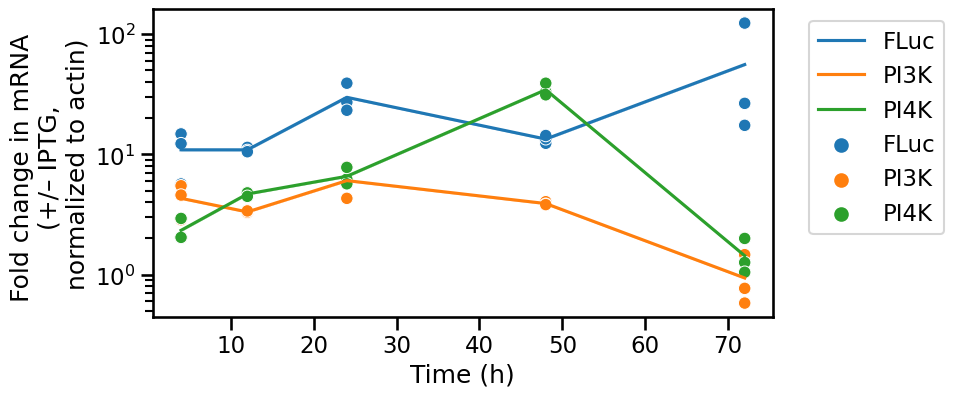

In [274]:
dat = dat.loc[ (dat['Line']=='pPC089') | (dat['Line']=='pPC127') | (dat['Line']=='pPC129'), ]

dat = dat.replace('pPC089','FLuc').replace('pPC127','PI3K').replace('pPC129','PI4K')

plt.figure(figsize=(8,4))
sns.set_context("talk")
ax = sns.lineplot(dat,hue='Line',y='Fold change',x='Hours', errorbar=('ci', 0))
ax = sns.scatterplot(dat,hue='Line',y='Fold change',x='Hours')
plt.yscale('log')
plt.xlabel('Time (h)')
plt.ylabel('Fold change in mRNA \n(+/– IPTG, \nnormalized to actin)')
# ax.get_legend().remove()
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")